# Udacity Dataset

A first look at the data and importing the libraries:

In [3]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
%matplotlib inline
import math
import numpy as np
import seaborn as sns 
import unicodecsv

In [4]:
enrollments = pd.read_csv('enrollments.csv')
daily_engagement = pd.read_csv('daily_engagement.csv')
project_submissions = pd.read_csv('project_submissions.csv')

In [17]:
enrollments.head(3)

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65.0,True,True
1,448,canceled,2014-11-05,2014-11-10,5.0,True,True
2,448,canceled,2015-01-27,2015-01-27,0.0,True,True


In [19]:
enrollments["days_to_cancel"].describe()

count    988.000000
mean      43.917004
std       50.869513
min        0.000000
25%        5.000000
50%       22.000000
75%       65.000000
max      249.000000
Name: days_to_cancel, dtype: float64

In [9]:
len(enrollments['account_key'].unique())

1302

In [29]:
daily_engagement.head(3)

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0


In [30]:
daily_engagement = daily_engagement.rename(columns = {'acct':'account_key'})

In [31]:
daily_engagement.describe()

,account_key,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
count,136240.000000,136240.000000,136240.000000,136240.000000,136240.000000
mean,449.069488,0.341060,24.551680,0.128795,0.006731
std,321.104209,0.624565,62.102959,0.469311,0.085108
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000,0.000000
50%,392.000000,0.000000,0.000000,0.000000,0.000000
75%,597.000000,1.000000,7.307366,0.000000,0.000000
max,1305.000000,10.000000,1030.883197,17.000000,3.000000


In [12]:
len(daily_engagement['acct'].unique())

1237

In [13]:
project_submissions.head(3)

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED


In [14]:
len(project_submissions['account_key'].unique())

743

# Fixing Datatypes by converting to datetime objects


In [44]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

In [56]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [58]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

TypeError: string indices must be integers, not str

In [59]:
enrollments[0]

KeyError: 0

In [15]:
df_enrollments = pd.read_csv('enrollments.csv')
df_enrollments = df_enrollments[df_enrollments['is_udacity'] == False]
df_enrollments

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
9,700,canceled,2014-11-10,2014-11-16,6.0,False,True
10,429,canceled,2014-11-10,2015-03-10,120.0,False,True
11,429,canceled,2015-03-10,2015-06-17,99.0,False,True
12,60,canceled,2014-11-10,2015-01-14,65.0,False,True
13,60,canceled,2015-01-14,2015-04-01,77.0,False,True
14,60,current,2015-04-01,NaN,NaN,False,False
15,1300,canceled,2014-11-10,2014-11-16,6.0,False,True
16,369,current,2014-11-10,NaN,NaN,False,False
17,322,canceled,2014-11-10,2015-02-02,84.0,False,True
18,322,canceled,2015-02-12,2015-02-12,0.0,False,True


In [5]:
len(df_enrollments.groupby('account_key').size())

1296

In [16]:
def get_unique_students(df):
    unique_students = set()
    for df_point in df:
        unique_students.add(df_point['account_key'])
    return unique_students

In [22]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)


743

In [21]:
def mean_time_for_paid_students(time_spent, day_to_cancel):
    is_paid = days_to_cancel >=7
    paid_time = time_spent[is_paid]
    return paid_time.mean()
    return time_spent[days_to_cancel >=7].mean()


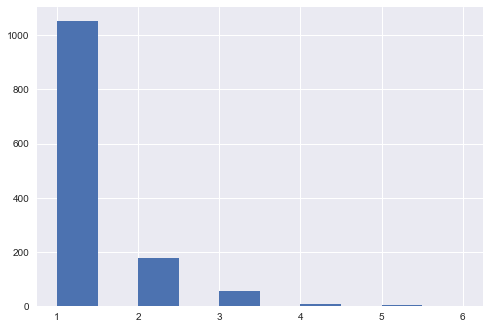

In [6]:
df_enrollments.groupby('account_key').size().hist()

In [7]:
df_engagement = pd.read_csv('daily_engagement.csv')
df_engagement

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0
5,0,2015-01-14,1.0,151.617577,1.0,0.0
6,0,2015-01-15,1.0,142.395964,0.0,0.0
7,0,2015-01-16,0.0,0.000000,0.0,0.0
8,0,2015-01-17,1.0,9.849562,0.0,0.0
9,0,2015-01-18,1.0,38.330548,0.0,0.0


In [29]:
len(df_engagement)
unique_engagement_students = get_unique_students(df_engagement)
len(unique_engagement_students)

TypeError: string indices must be integers, not str

In [8]:
df_submissions = pd.read_csv('project_submissions.csv')
df_submissions

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED
5,2015-04-06,2015-04-06,INCOMPLETE,381,3176718735,EVALUATED
6,2015-07-26,2015-07-28,INCOMPLETE,381,3165188753,EVALUATED
7,2015-05-31,2015-06-02,PASSED,381,3168208620,EVALUATED
8,2015-07-29,2015-07-29,PASSED,381,3165188753,EVALUATED
9,2015-07-29,2015-07-29,INCOMPLETE,381,3165188753,EVALUATED


In [26]:
unique_project_submitters = get_unique_students(df_submissions)
len(unique_project_submitters)

TypeError: string indices must be integers, not str

In [9]:
from datetime import datetime as dt

# Takes a date as a string, returns a Python datetime object. 
# If there is no date given, returns None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

In [10]:
# Takes a string which is either an empty string or represents an integer. 
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else: 
        return int(i)

In [11]:
# Clean up the data types in the enrollments table
for df_enrollments in df_enrollments: 
    df_enrollments['cancel_date'] = parse_date(enrollment['cancel_date'])
    df_enrollments['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    df_enrollments['is_canceled'] = enrollment['is_canceled'] =='True'
    df_enrollments['is_udacity'] = enrollment['is_udacity'] =='True'
    df_enrollments['join_date'] = parse_date(enrollment['join_date'])
enrollments[0]
    

NameError: name 'enrollment' is not defined